In [1]:
#DATA LOAD FOR C CODE
#change with your path containing results from python and from the quantized net
fc = open("c_res_total.txt","r")
fp = open("python_res_total.txt","r")

#avg_err = [[], [], [], []]
max_err_C = [[], [], [], []]
ch = [[], [], [], []]
for i in range(169):
    for j in range(250*64):
        c_output =  [float(n) for n in fc.readline().split()]
        python_output = [float(n) for n in fp.readline().split()]

        ch[0].append(abs(c_output[0]-python_output[0]))
        ch[1].append(abs(c_output[1]-python_output[1]))
        ch[2].append(abs(c_output[2]-python_output[2]))
        ch[3].append(abs(c_output[3]-python_output[3]))

    """     
    avg_err[0].append(sum(ch[0])/(64*250))
    avg_err[1].append(sum(ch[1])/(64*250))
    avg_err[2].append(sum(ch[2])/(64*250))
    avg_err[3].append(sum(ch[3])/(64*250)) 
    """

    max_err_C[0].append(max(ch[0]))
    max_err_C[1].append(max(ch[1]))
    max_err_C[2].append(max(ch[2]))
    max_err_C[3].append(max(ch[3]))

    ch[0].clear()
    ch[1].clear()
    ch[2].clear()
    ch[3].clear()

fp.close()
fc.close()

In [2]:
#DATA LOAD FOR CUDA CODE
#change with your path containing results from python and from the quantized net
fc = open("cuda_res.txt","r")
fp = open("python_res_total.txt","r")

#avg_err = [[], [], [], []]
max_err_cuda = [[], [], [], []]
ch = [[], [], [], []]
for i in range(169):
    for j in range(250*64):
        c_output =  [float(n) for n in fc.readline().split()]
        python_output = [float(n) for n in fp.readline().split()]

        ch[0].append(abs(c_output[0]-python_output[0]))
        ch[1].append(abs(c_output[1]-python_output[1]))
        ch[2].append(abs(c_output[2]-python_output[2]))
        ch[3].append(abs(c_output[3]-python_output[3]))

    """     
    avg_err[0].append(sum(ch[0])/(64*250))
    avg_err[1].append(sum(ch[1])/(64*250))
    avg_err[2].append(sum(ch[2])/(64*250))
    avg_err[3].append(sum(ch[3])/(64*250)) 
    """

    max_err_cuda[0].append(max(ch[0]))
    max_err_cuda[1].append(max(ch[1]))
    max_err_cuda[2].append(max(ch[2]))
    max_err_cuda[3].append(max(ch[3]))

    ch[0].clear()
    ch[1].clear()
    ch[2].clear()
    ch[3].clear()

fp.close()
fc.close()

In [3]:
'''
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee'])

labels = ['S1','Systole',"S2","Diastole"]

fig, axs = plt.subplots(2, 1)
#set fig height
fig.set_figheight(1.75)
#axs[0].set_title(f'Max error for C implementation')
for i in range(4):
    axs[0].plot(max_err_C[i], alpha=0.4, label=labels[i])
    axs[1].plot(max_err_cuda[i], alpha=0.4, label=labels[i])
    #axs[0].set_xlabel('Subject\n\n(a) Max error for C implementation')
axs[0].set_ylabel('MAE')
#axs[0].grid()
#remove values on x-axis
#axs[0].set_xticks([])
#axs[0].legend(loc="upper left", fontsize='xx-small',ncols=4)
#axs[1].set_title(f'Max error for CUDA implementation')
axs[1].set_xlabel('Subject')
axs[1].set_ylabel('MAE')
#axs[1].grid()
#axs[1].legend(loc="upper left", fontsize='xx-small', ncols=4)
axs[0].legend(bbox_to_anchor=(0,1.1, 1,0.2), fontsize='small', ncols=4)
#axs[1].legend(bbox_to_anchor=(1.04, 1), fontsize='small')
#fig.suptitle('Max error in each patient', fontsize=16)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.tight_layout()
plt.gcf().set_dpi(300)
plt.savefig("cudac.png", format="png", dpi=600, bbox_inches='tight')
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nimport scienceplots\n\nplt.style.use([\'science\',\'ieee\'])\n\nlabels = [\'S1\',\'Systole\',"S2","Diastole"]\n\nfig, axs = plt.subplots(2, 1)\n#set fig height\nfig.set_figheight(1.75)\n#axs[0].set_title(f\'Max error for C implementation\')\nfor i in range(4):\n    axs[0].plot(max_err_C[i], alpha=0.4, label=labels[i])\n    axs[1].plot(max_err_cuda[i], alpha=0.4, label=labels[i])\n    #axs[0].set_xlabel(\'Subject\n\n(a) Max error for C implementation\')\naxs[0].set_ylabel(\'MAE\')\n#axs[0].grid()\n#remove values on x-axis\n#axs[0].set_xticks([])\n#axs[0].legend(loc="upper left", fontsize=\'xx-small\',ncols=4)\n#axs[1].set_title(f\'Max error for CUDA implementation\')\naxs[1].set_xlabel(\'Subject\')\naxs[1].set_ylabel(\'MAE\')\n#axs[1].grid()\n#axs[1].legend(loc="upper left", fontsize=\'xx-small\', ncols=4)\naxs[0].legend(bbox_to_anchor=(0,1.1, 1,0.2), fontsize=\'small\', ncols=4)\n#axs[1].legend(bbox_to_anchor=(1.04, 1), fontsize=\'small\')\n#fig.supt

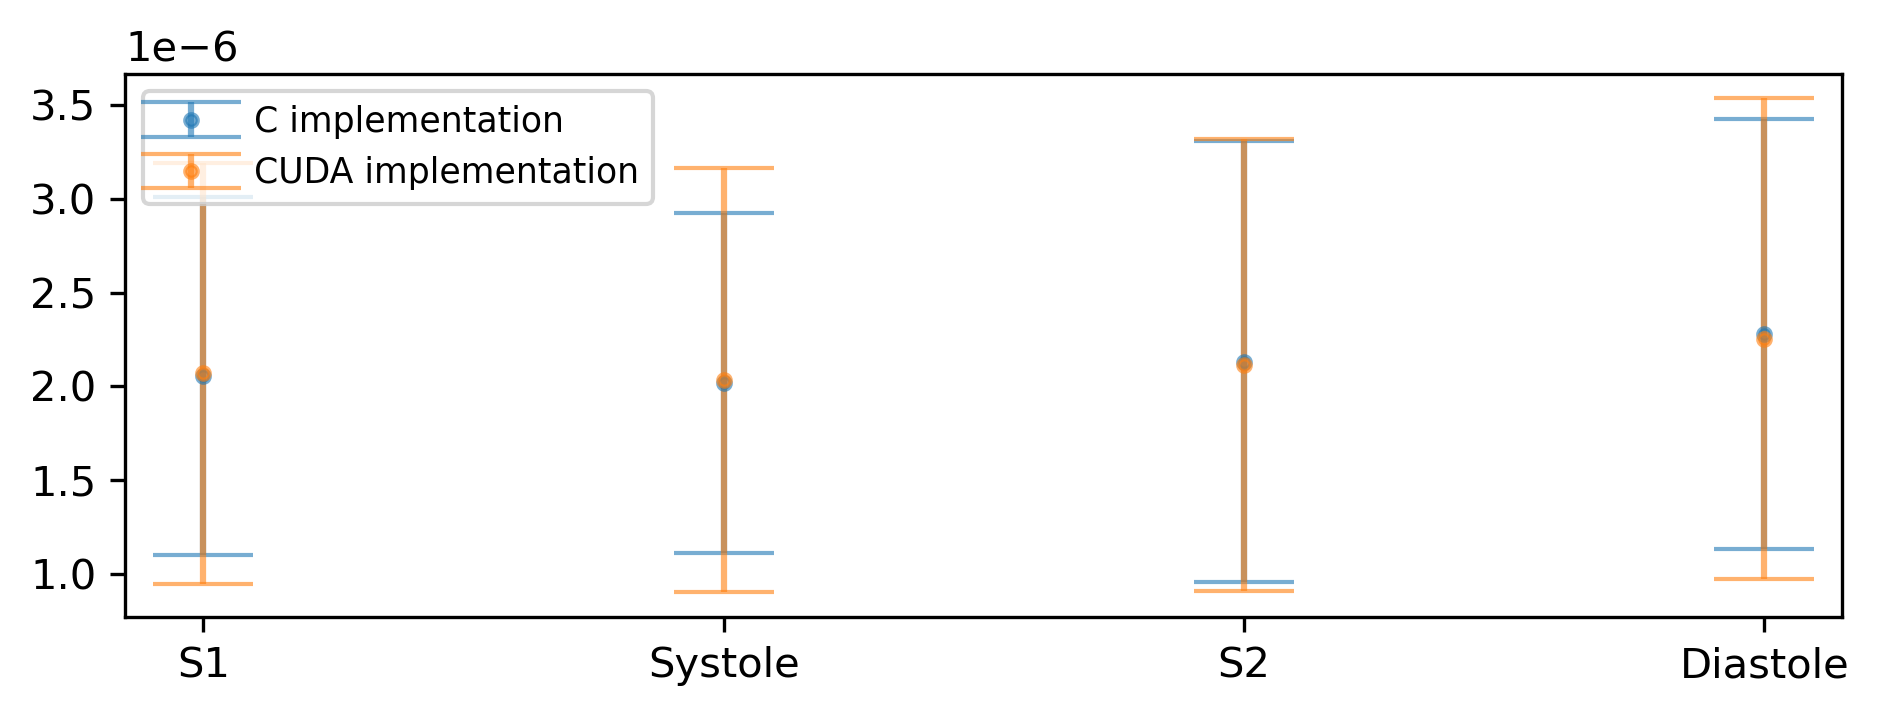

In [6]:
import numpy
import matplotlib.pyplot as plt

y_c = []
e_c =[]
labels = ["S1", "Systole", "S2", "Diastole"]

for i in range(4):
    y_c.append(numpy.mean(max_err_C[i]))
    e_c.append(numpy.std(max_err_C[i]))

plt.figure().set_figheight(2.5)
plt.errorbar(labels, y_c, e_c, linestyle='None', capsize=12, marker='.', alpha=0.6)

y_cuda = []
e_cuda =[]

for i in range(4):
    y_cuda.append(numpy.mean(max_err_cuda[i]))
    e_cuda.append(numpy.std(max_err_cuda[i]))

plt.errorbar(labels, y_cuda, e_cuda, linestyle='None', capsize=12, marker='.', alpha=0.6)

#errorbar with trasparency and legend
plt.legend(['C implementation', 'CUDA implementation'], loc='upper left', fontsize='small')
plt.tight_layout()
plt.gcf().set_dpi(300)
plt.savefig("error_mean_std_c_cuda.svg", format="svg")
plt.show()


In [7]:

#Mean and std. dev C max error
print("Mean and std. dev C max error")
for i in range(4):
    print(labels[i])
    print("MEAN: "+str(numpy.mean(max_err_C[i])))
    print("STD. DEV.: "+str(numpy.std(max_err_C[i])))

#Mean and std. dev CUDA max error
print("Mean and std. dev CUDA max error")
for i in range(4):
    print(labels[i])
    print("MEAN: "+str(numpy.mean(max_err_cuda[i])))
    print("STD. DEV: "+str(numpy.std(max_err_cuda[i])))

Mean and std. dev C max error
S1
MEAN: 2.054423076930181e-06
STD. DEV.: 9.568247631266816e-07
Systole
MEAN: 2.0155869822510375e-06
STD. DEV.: 9.079739923160032e-07
S2
MEAN: 2.1315242603573214e-06
STD. DEV.: 1.176393806504787e-06
Diastole
MEAN: 2.2788177514771864e-06
STD. DEV.: 1.1496642948284347e-06
Mean and std. dev CUDA max error
S1
MEAN: 2.069232544377745e-06
STD. DEV: 1.1245471781148081e-06
Systole
MEAN: 2.0324668639059536e-06
STD. DEV: 1.1318421572622207e-06
S2
MEAN: 2.1134094674598606e-06
STD. DEV: 1.2046250826400236e-06
Diastole
MEAN: 2.2544804733687066e-06
STD. DEV: 1.2832486633481651e-06


In [ ]:
""" #change with your path containing results from python and from the quantized net
fc = open("cuda_res.txt","r")
fp = open("python_res_total.txt","r")

avg_err = [[], [], [], []]
max_err = [[], [], [], []]
ch = [[], [], [], []]
for i in range(169):
    for j in range(250*64):
        c_output =  [float(n) for n in fc.readline().split()]
        python_output = [float(n) for n in fp.readline().split()]

        ch[0].append(abs(c_output[0]-python_output[0]))
        ch[1].append(abs(c_output[1]-python_output[1]))
        ch[2].append(abs(c_output[2]-python_output[2]))
        ch[3].append(abs(c_output[3]-python_output[3]))

    avg_err[0].append(sum(ch[0])/(64*250))
    avg_err[1].append(sum(ch[1])/(64*250))
    avg_err[2].append(sum(ch[2])/(64*250))
    avg_err[3].append(sum(ch[3])/(64*250))

    max_err[0].append(max(ch[0]))
    max_err[1].append(max(ch[1]))
    max_err[2].append(max(ch[2]))
    max_err[3].append(max(ch[3]))

    ch[0].clear()
    ch[1].clear()
    ch[2].clear()
    ch[3].clear()

fp.close()
fc.close()

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    axs[i].plot(avg_err[i], c='blue', alpha=0.4)
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Patient set')
    axs[i].set_ylabel('avg. error')
    axs[i].grid()
fig.suptitle('Avg. error in each patient', fontsize=16)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    axs[i].plot(max_err[i], c='blue', alpha=0.4)
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Patient set')
    axs[i].set_ylabel('max error')
    axs[i].grid()
fig.suptitle('Max error in each patient', fontsize=16)
plt.tight_layout()
plt.show() """

' #change with your path containing results from python and from the quantized net\nfc = open("cuda_res.txt","r")\nfp = open("python_res_total.txt","r")\n\navg_err = [[], [], [], []]\nmax_err = [[], [], [], []]\nch = [[], [], [], []]\nfor i in range(169):\n    for j in range(250*64):\n        c_output =  [float(n) for n in fc.readline().split()]\n        python_output = [float(n) for n in fp.readline().split()]\n\n        ch[0].append(abs(c_output[0]-python_output[0]))\n        ch[1].append(abs(c_output[1]-python_output[1]))\n        ch[2].append(abs(c_output[2]-python_output[2]))\n        ch[3].append(abs(c_output[3]-python_output[3]))\n\n    avg_err[0].append(sum(ch[0])/(64*250))\n    avg_err[1].append(sum(ch[1])/(64*250))\n    avg_err[2].append(sum(ch[2])/(64*250))\n    avg_err[3].append(sum(ch[3])/(64*250))\n\n    max_err[0].append(max(ch[0]))\n    max_err[1].append(max(ch[1]))\n    max_err[2].append(max(ch[2]))\n    max_err[3].append(max(ch[3]))\n\n    ch[0].clear()\n    ch[1].cle